In [1]:
%matplotlib inline

# Analyse your spatial data using sliding windows

This example shows how to use {func}`squidpy.tl.sliding_window` to divide the 
obs of an {attr}`anndata.AnnData` object into adjecent, potentially overlapping,
windows.

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import squidpy as sq

First, let's download the MIBI-TOF dataset.

In [4]:
adata = sq.datasets.mibitof()

This data set contains a cell type annotation in {attr}`anndata.AnnData.obs["Cluster"]`
and a slide annotation in {attr}`anndata.AnnData.obs["library_id"]`

In [5]:
adata.obs

,row_num,point,cell_id,X1,center_rowcoord,center_colcoord,cell_size,category,donor,Cluster,batch,library_id
3034-0,3086,23,2,60316.0,269.0,7.0,408.0,carcinoma,21d7,Epithelial,0,point23
3035-0,3087,23,3,60317.0,294.0,6.0,408.0,carcinoma,21d7,Epithelial,0,point23
3036-0,3088,23,4,60318.0,338.0,4.0,304.0,carcinoma,21d7,Imm_other,0,point23
3037-0,3089,23,6,60320.0,372.0,6.0,219.0,carcinoma,21d7,Myeloid_CD11c,0,point23
3038-0,3090,23,8,60322.0,417.0,5.0,303.0,carcinoma,21d7,Myeloid_CD11c,0,point23
...,...,...,...,...,...,...,...,...,...,...,...,...
47342-2,48953,16,1103,2779.0,143.0,1016.0,283.0,carcinoma,90de,Fibroblast,2,point16
47343-2,48954,16,1104,2780.0,814.0,1017.0,147.0,carcinoma,90de,Fibroblast,2,point16
47344-2,48955,16,1105,2781.0,874.0,1018.0,142.0,carcinoma,90de,Imm_other,2,point16
47345-2,48956,16,1106,2782.0,257.0,1019.0,108.0,carcinoma,90de,Fibroblast,2,point16


Stratified by library, we now want to assign each cell to a sliding window of a given size.

In [6]:
sq.tl.sliding_window(
    adata=adata,
    library_key="library_id", # to stratify by sample
    window_size=300, 
    overlap=0,
    copy=False, # we modify in place
)

Let's inspect the column that the function has added to our data.

In [7]:
adata.obs["sliding_window_assignment"]

3034-0      window_0
3035-0      window_0
3036-0      window_4
3037-0      window_4
3038-0      window_4
             ...    
47342-2     window_3
47343-2    window_11
47344-2    window_11
47345-2     window_3
47346-2     window_7
Name: sliding_window_assignment, Length: 3309, dtype: category
Categories (16, object): ['window_0' < 'window_1' < 'window_2' < 'window_3' ... 'window_12' < 'window_13' < 'window_14' < 'window_15']

We see that each observation has been assigned to a window, which is defined by the `sliding_window_assignment` column. We can visualise this using {func}`squidpy.pl.spatial_scatter`.

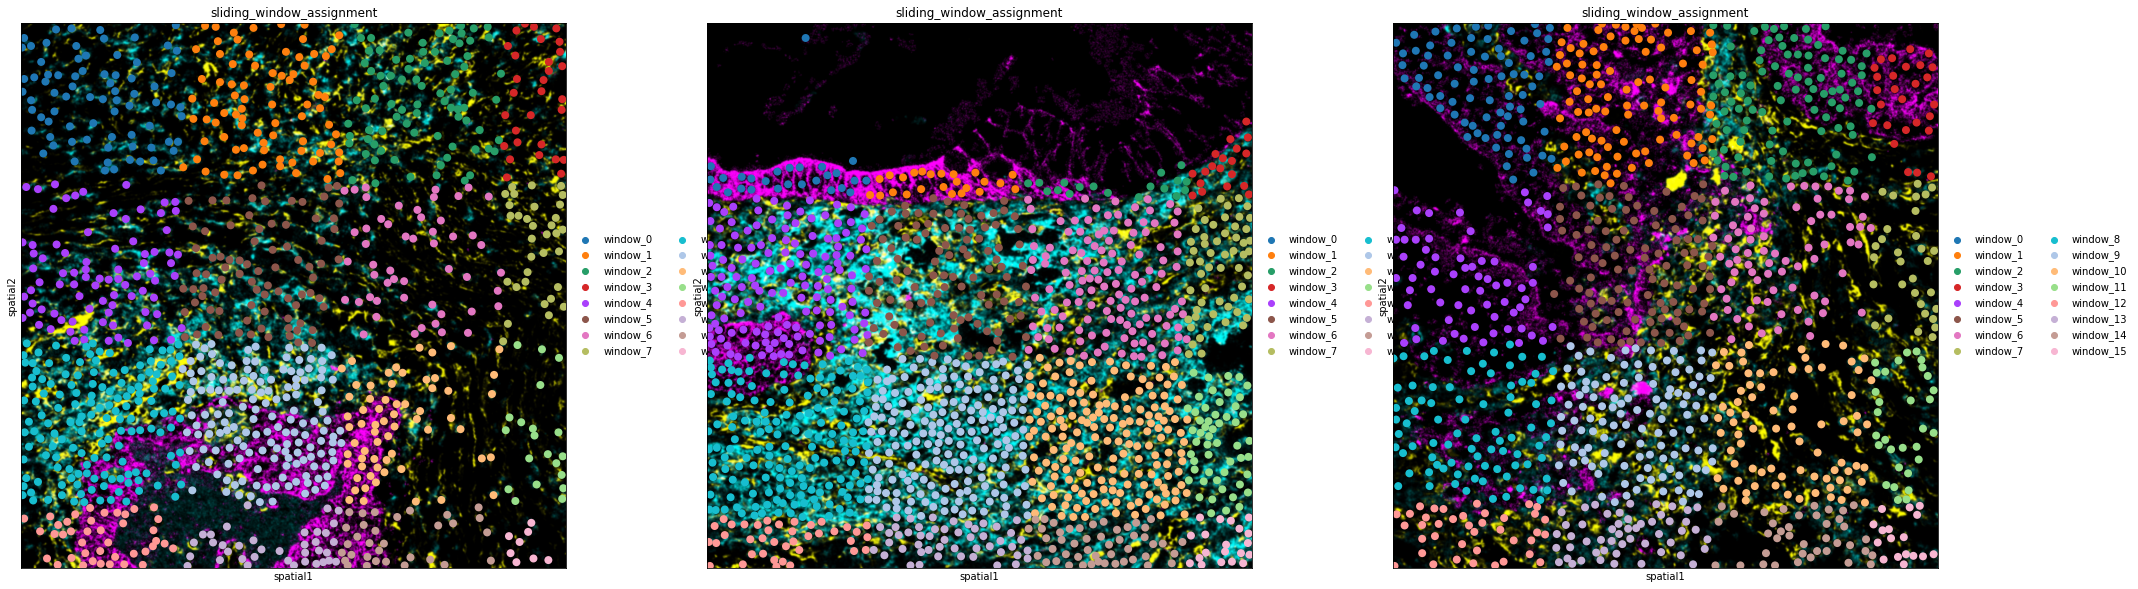

In [8]:
sq.pl.spatial_scatter(
    adata, color="sliding_window_assignment", library_key="library_id", figsize=(10, 10)
)

Optionally, we can also look at a specific sample:

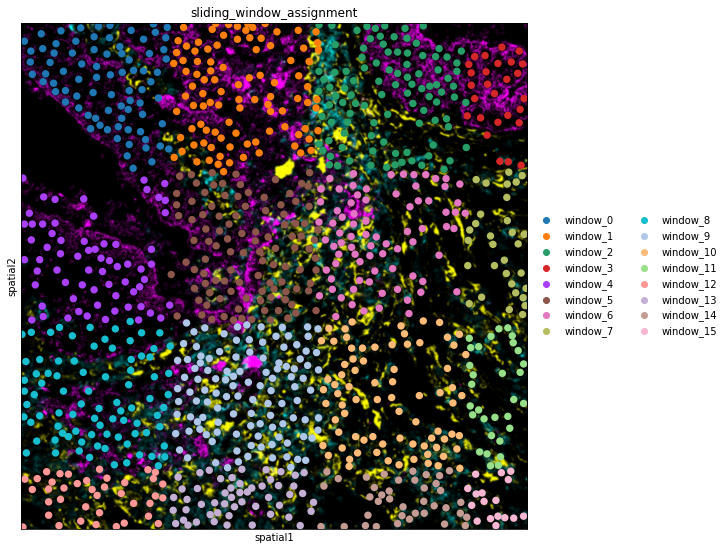

In [9]:
sq.pl.spatial_scatter(
    adata,
    color=["sliding_window_assignment"],
    library_key="library_id",
    library_id=["point8"],
    figsize=(10, 10),
)

We see that the function has created 16 windows, this is based on the `window_size` of 200 and an `overlap` of 0. The behaviour of the function changes when we use an overlap, since then observations will be assigned to multiple windows. This information can no longer be stored in a single column. Let's try this out.

In [10]:
adata = sq.datasets.mibitof() # fresh copy

sq.tl.sliding_window(
    adata=adata,
    library_key="library_id",  # to stratify by sample
    window_size=300,
    overlap=50,
    copy=False,  # we modify in place
)

x_start              2.0
x_end              302.0
y_start             28.0
y_end              328.0
window_label    window_0
Name: 0, dtype: object
x_start            252.0
x_end              552.0
y_start             28.0
y_end              328.0
window_label    window_1
Name: 4, dtype: object
x_start            502.0
x_end              802.0
y_start             28.0
y_end              328.0
window_label    window_2
Name: 8, dtype: object
x_start            752.0
x_end             1020.0
y_start             28.0
y_end              328.0
window_label    window_3
Name: 12, dtype: object
x_start           1002.0
x_end             1020.0
y_start             28.0
y_end              328.0
window_label    window_4
Name: 16, dtype: object
x_start              2.0
x_end              302.0
y_start            278.0
y_end              578.0
window_label    window_5
Name: 1, dtype: object
x_start            252.0
x_end              552.0
y_start            278.0
y_end              578.0
window_lab

When now inspecting the {attr}`anndata.AnnData.obs`, we see that several columns have been added, each indicating whether a cell has been assigned to a specific window.

In [11]:
adata.obs

,row_num,point,cell_id,X1,center_rowcoord,center_colcoord,cell_size,category,donor,Cluster,...,sliding_window_assignment_window_11,sliding_window_assignment_window_15,sliding_window_assignment_window_19,sliding_window_assignment_window_20,sliding_window_assignment_window_21,sliding_window_assignment_window_22,sliding_window_assignment_window_23,sliding_window_assignment_window_24,globalX,globalY
3034-0,3086,23,2,60316.0,269.0,7.0,408.0,carcinoma,21d7,Epithelial,...,False,False,False,False,False,False,False,False,7.0,269.0
3035-0,3087,23,3,60317.0,294.0,6.0,408.0,carcinoma,21d7,Epithelial,...,False,False,False,False,False,False,False,False,6.0,294.0
3036-0,3088,23,4,60318.0,338.0,4.0,304.0,carcinoma,21d7,Imm_other,...,False,False,False,False,False,False,False,False,4.0,338.0
3037-0,3089,23,6,60320.0,372.0,6.0,219.0,carcinoma,21d7,Myeloid_CD11c,...,False,False,False,False,False,False,False,False,6.0,372.0
3038-0,3090,23,8,60322.0,417.0,5.0,303.0,carcinoma,21d7,Myeloid_CD11c,...,False,False,False,False,False,False,False,False,5.0,417.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47342-2,48953,16,1103,2779.0,143.0,1016.0,283.0,carcinoma,90de,Fibroblast,...,False,True,False,True,False,False,False,False,1016.0,143.0
47343-2,48954,16,1104,2780.0,814.0,1017.0,147.0,carcinoma,90de,Fibroblast,...,False,False,False,False,False,False,True,False,1017.0,814.0
47344-2,48955,16,1105,2781.0,874.0,1018.0,142.0,carcinoma,90de,Imm_other,...,False,False,False,False,False,False,True,False,1018.0,874.0
47345-2,48956,16,1106,2782.0,257.0,1019.0,108.0,carcinoma,90de,Fibroblast,...,False,True,False,True,True,False,False,False,1019.0,257.0


ValueError: Empty AnnData, reason: None of `adata.obs[library_id]` are in `['point23']`.

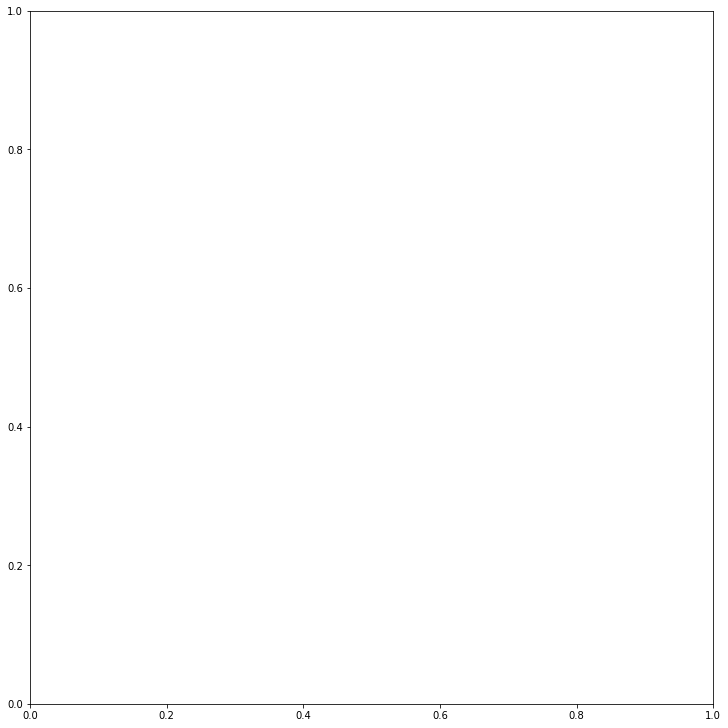

In [12]:

sq.pl.spatial_scatter(
    adata[adata.obs["sliding_window_assignment_window_15"]],
    color=["sliding_window_assignment"],
    library_key="library_id",
    library_id="point23",
    figsize=(10, 10),
)

In [ ]:
point8_adata = adata[adata.obs["library_id"] == "point8"]

for i in range(24):
    print(
        f"Window {i}: {point8_adata.obs[f'sliding_window_assignment_window_{i}'].sum()} cells"
    )

Window 0: 0 cells
Window 1: 0 cells
Window 2: 0 cells
Window 3: 0 cells
Window 4: 0 cells
Window 5: 0 cells
Window 6: 0 cells
Window 7: 0 cells
Window 8: 0 cells
Window 9: 0 cells
Window 10: 0 cells
Window 11: 0 cells
Window 12: 0 cells
Window 13: 0 cells
Window 14: 0 cells
Window 15: 0 cells
Window 16: 0 cells
Window 17: 0 cells
Window 18: 0 cells
Window 19: 0 cells
Window 20: 0 cells
Window 21: 0 cells
Window 22: 0 cells
Window 23: 0 cells


We can 

ValueError: Empty AnnData, reason: None of `adata.obs[library_id]` are in `['point23']`.

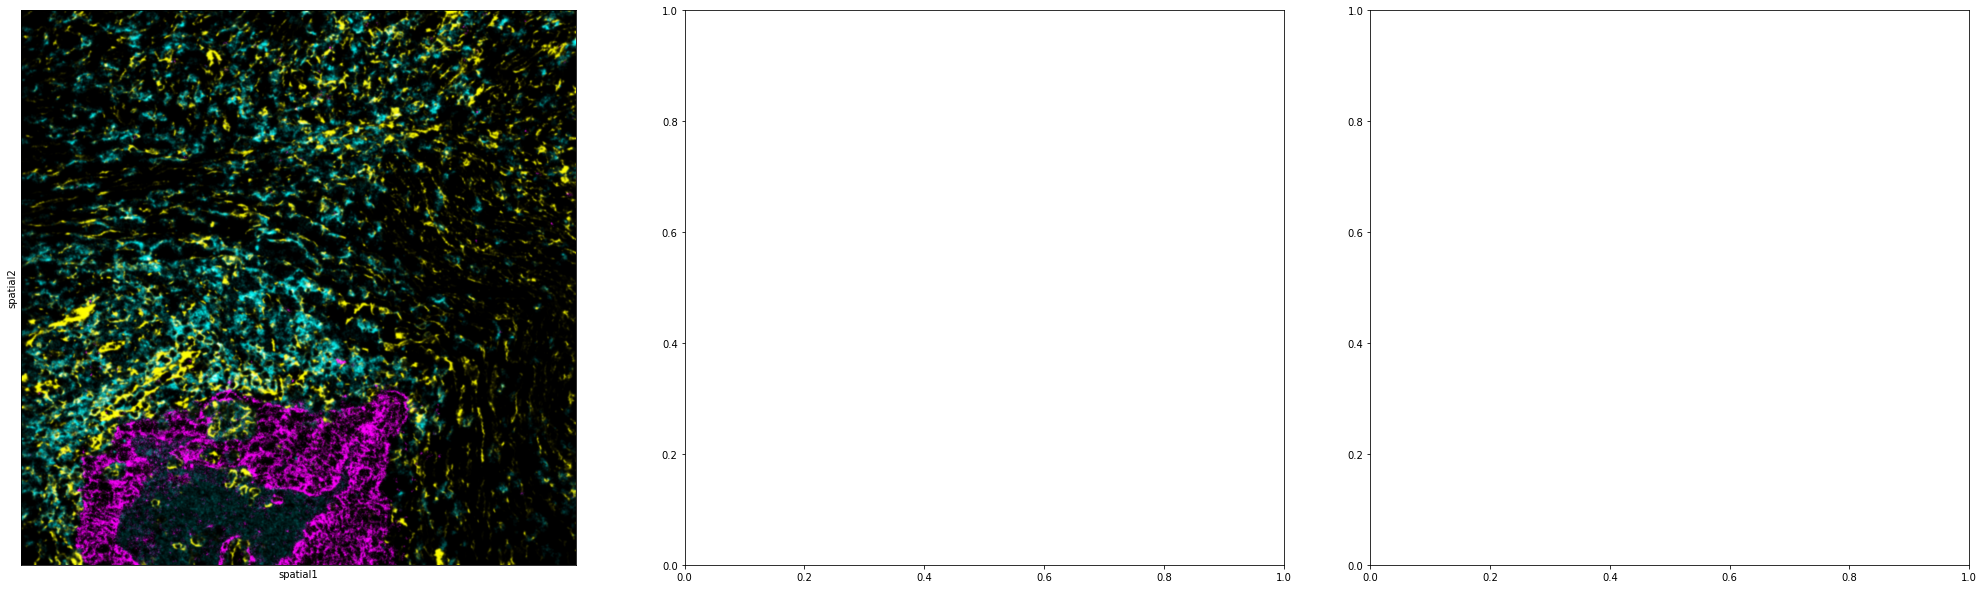

In [ ]:
# total_count = 0
# for i in range(24):
#     col_name = f"sliding_window_assignment_window_{i}"
sq.pl.spatial_scatter(
    adata[adata.obs["sliding_window_assignment_window_1"]],
    library_key="library_id",
    # library_id=["point8"],
    figsize=(10, 10),
)

### For reproducibility

In [ ]:
import numpy
import pandas
import matplotlib
import scanpy
import squidpy
import spatialdata

%load_ext watermark

In [15]:
%watermark -v -m -p numpy,pandas,matplotlib,scanpy,squidpy,spatialdata

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 8.3.0

numpy      : 1.23.4
pandas     : 2.2.2
matplotlib : 3.9.2
scanpy     : 1.10.2
squidpy    : 1.6.2.dev34+gb4a49c9.d20241030
spatialdata: 0.2.2

Compiler    : Clang 15.0.7 
OS          : Darwin
Release     : 22.2.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

